In [2]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Text(0.5, 1.0, '9')

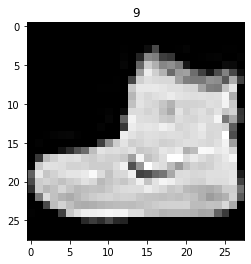

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap="gray")
plt.title(train_labels[0])

In [4]:
def get_preprocessed_image(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_x, train_y = get_preprocessed_image(train_images, train_labels)
#val_x, val_y = get_preprocessed_image(test_images, test_labels)

In [5]:
from tensorflow.keras.utils import to_categorical

train_y = to_categorical(train_y)
#val_y = to_categorical(val_y)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

image_size = 28

model = Sequential([
    Flatten(input_shape=(image_size, image_size)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import Accuracy
with tf.device("/gpu:0"):
    np.random.seed(3)
    tf.random.set_seed(3)

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [8]:
epochs = 30
batch_size = 32

history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/30
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5771 - accuracy: 0.7955
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4230 - accuracy: 0.8505
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3890 - accuracy: 0.8605
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3687 - accuracy: 0.8684
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3504 - accuracy: 0.8738
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3382 - accuracy: 0.8769
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3275 - accuracy: 0.8814
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3184 - accuracy: 0.8849
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3106 - accuracy: 0.8870
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.304

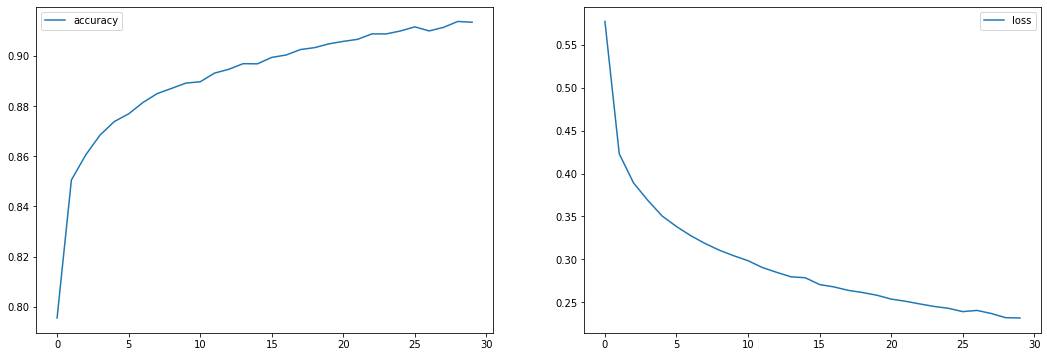

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'loss')
plt.legend()

plt.show()

